## Basic Python

We'll quickly review some of the basics of Python, as well as some conventions that I use.

First let's review a simple style guide:

https://docs.python-guide.org/writing/style/

Worth reading in full, but to summarize quickly

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# Imports

Now our usual imports. You may be aware that convention adds all imports at the top of your code. Imports part way through code are considered bad form, and are likely to give you a headache in notebooks where cells are re-run in different orders.

There is one more convention to imports. Standard library packages (os, sys, time, etc.) are imported first, by convention one per line.

Community packages are imported next, again by convention one per line. Although if you need two namespaces from a community package, it is generally acceptable to import them together.

I'll add some additional packages to my usual imports as examples

In [2]:
import time
from time import gmtime, strftime

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Namespaces

Namespaces have come up twice already, let's clear that up.

Just think of namespaces as "levels" within a module. I've imported `time` and two functions from time above as an example

In [3]:
print(strftime("%a, %d %b %Y %H:%M:%S +0000", gmtime()))
print(time.strftime("%a, %d %b %Y %H:%M:%S +0000", time.gmtime()))

Wed, 22 Jan 2025 15:12:55 +0000
Wed, 22 Jan 2025 15:12:55 +0000


We can see that whether we import them directly or call the functions through the `time` module, they are equivalent. I've also imported `matplotlib` in multiple ways so we can see this behavior is the same a "level" "down", or at any "level". 

`matplotlib.pyplot` vs `plt` illustrates the purpose of these imports very well though. Programmers tend to be lazy; the less we have to type, the better.

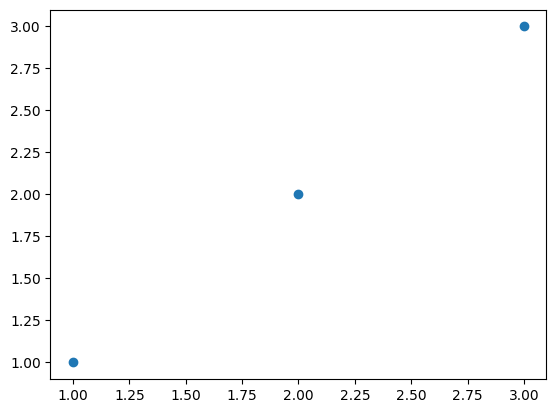

In [5]:
x = [1,2,3]
y = [1,2,3]
plt.scatter(x,y)

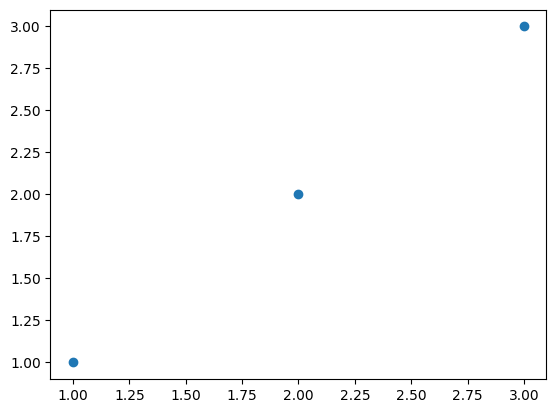

In [6]:
matplotlib.pyplot.scatter(x,y)

# Numpy

We'll use a lot of numpy so let's review some key points. First arrays vs lists. Lists are built-in to the core python, and have specific "pythonic" behavior. But they are not interchangeable with arrays! Lists can be easily converted to arrays, and visa-versa, but you typically need to choose one or the other. Let's see some examples

In [7]:
print(x + y)
print(np.array(x) + np.array(y))

print(x * 3)
print(np.array(x) * 3)

print(x + np.array(x))
print(x * np.array(x))

[1, 2, 3, 1, 2, 3]
[2 4 6]
[1, 2, 3, 1, 2, 3, 1, 2, 3]
[3 6 9]
[2 4 6]
[1 4 9]


# Pause for style!

Notice how I added a space around each operator. Notice how much more readable x + y is than x+y. This is part of the pep 8 coding standard, and while I won't grade for it, I will harangue you about it.

## Functions

It's worth reviewing functions quickly. There's not a lot to review, in fact the style guide goes into more detail than I will, and I highly recommend reading it in full.

Functions are infinitely flexible. They take any number of inputs, what we call "arguments", and return any number of outputs. There are two types of arugments: arguments (often abbreviated "args" in documentation) and keyword arguments (abbreivated "kwargs"). Arguments are passed in order and close attention must be paid to ensure you pass args in the order the function expects. Keyword arguments are specified explicitly, and can be passed in any order. There are no strict rules for passing args vs kwargs, but it is more "pythonic" to use a minimum number of args and use explicit kwargs for as many arguments as make sense.

Another advantage of kwargs is they have a default value. This makes them good for flags, or for arguments that _usually_ one value, but you ocassionally want to change it. kwargs can also be passed in order, after args. But again: explicit is better than implicit. Also for this reason, args must be specified first in the function definition, and the function call.

A final style note, a more "pythonic" approach to functions is to keep them simple. A function can be as complicated as you like, but it is generally best practice to keep them simple. Functions can call other functions, allowing you to compartmentalize complexity.

Some toy examples.

In [8]:
def line(m, x, b):
    return m * x + b

x = np.array(x)

print(line(5, x, 0))

def line2(m, x, b=0):
    return m * x + b

print(line2(5, x, 0))
print(line2(5, x, b=0))
print(line2(5, x))
print(line2(5, x, 1))
print(line2(5, x, b=1))

[ 5 10 15]
[ 5 10 15]
[ 5 10 15]
[ 5 10 15]
[ 6 11 16]
[ 6 11 16]


## Loops

You'll encounter two types of loops in python, `for` and `while` loops. For loops "iterate" over some "iterable" (so a list, an array, potentially a "generator" like `range`, etc), so they will always execute a certain number of times on a specific set of things. This tends to be what we use most of the time because we tend to want to loop over some input list.

`while` loops are critical for tasks where you don't know how many times it needs to execute. For example, we will see in many cases in this course we need to run a process until a certain precision is reached. This can't be done with `for` loops. But `while` loops can also be dangerous! If you don't carefully plan the exit condition, the loop will run infinitely.

# List comprehensions

Python is a very flexible language. One thing it allows for doing `for` loops in a single line. I do this a lot because I find it elegant. However, it can be confusing, and is probably never *necessary*; in every case I can imagine you can use an actual for loop instead. Nevertheless, I want you to be aware of it, if for no other reason than it might pop up in my code.

List comprehesions happen inside square brackets (because they are lists), and can be very simple, or very complex.

In [9]:
# list comp
x = [i for i in range(10)]
y = [0 for i in x]
z = [i**2 for i in x if i % 2 == 0]

# and lets slip in some string formatting for fun
print(f"{x} \n{y} \n{z} \n")

# probably don't ever do this. But it's possible. Because python!
print({str(i): i**3 for i in x})

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
[0, 4, 16, 36, 64] 

{'0': 0, '1': 1, '2': 8, '3': 27, '4': 64, '5': 125, '6': 216, '7': 343, '8': 512, '9': 729}


In [10]:
# for i in x now a third time; hideous. x is a bad variable name!!
for i in x:
    if i % 2 == 0:
        # more string formatting!
        print(f"{i**2:04d}, {i**2:4.2f}")

0000, 0.00
0004, 4.00
0016, 16.00
0036, 36.00
0064, 64.00


In [11]:
x = list()
while len(x) < 10:
    x.append(len(x))

print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## Plotting

Plotting will of course be fairly important in this course. Nearly every exercise will require some plot to visualize or validate your code. I am quite comfortable with `matplotlib` and generally recommend it to you. But other libraries, such as seaborn, exist and you are welcome to use them. I may be less helpful debugging that code however.

You may be used to using `plt` by itself, as I did above. This is perfectly fine, but it misses an important subtlety I want to point out. Anytime you call `plt`, an "axis" object is created, and that object is modified by further `plt` commands until you start a new cell, or create a new figure explicitly. Generally, while working in notebooks, this behavior is fine, and completely under-the-hood. Although you will occasionally notice when you're doing something more complex, you have to call `plt.gca()` ("get current axis"), which allows you to directly access the implicit axis object.

You can also work with axes objectes directly, and in fact if you ever make multi-panel plots, you will **have to** do so. For most, perhaps all, of this course, you can probably use either method. Let's show that they are interchangeable

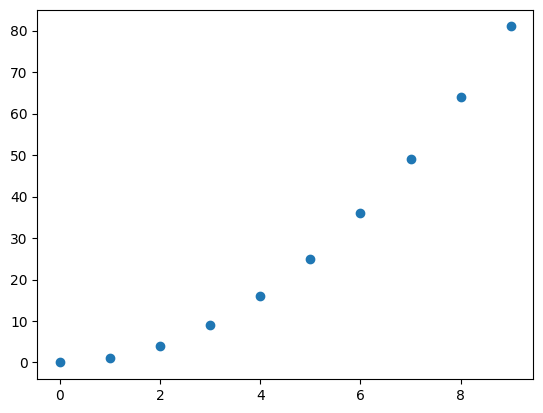

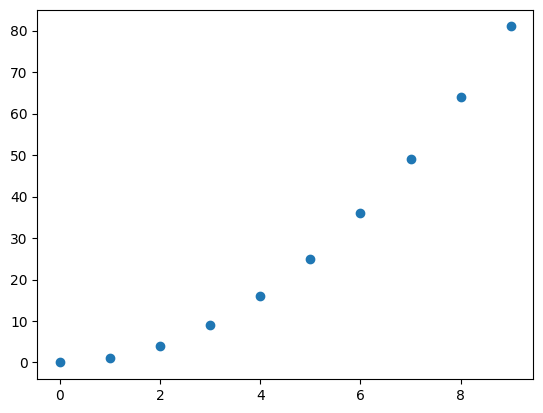

In [12]:
x = np.arange(0, 10, 1)
y = x**2

plt.scatter(x, y)

fig = plt.figure()
ax = fig.add_subplot(111) # 111 means 1 row, 1 column, first subplot. google to learn more about subplots
ax.scatter(x, y)

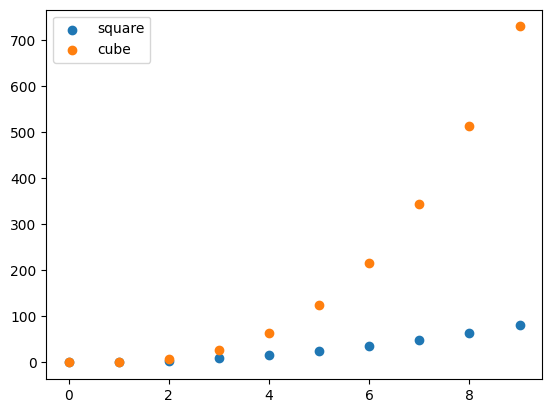

In [13]:
plt.scatter(x, x**2, label="square")
plt.scatter(x, x**3, label="cube")
plt.legend(loc="best")

Text(0.5, 1.0, 'Math on x')

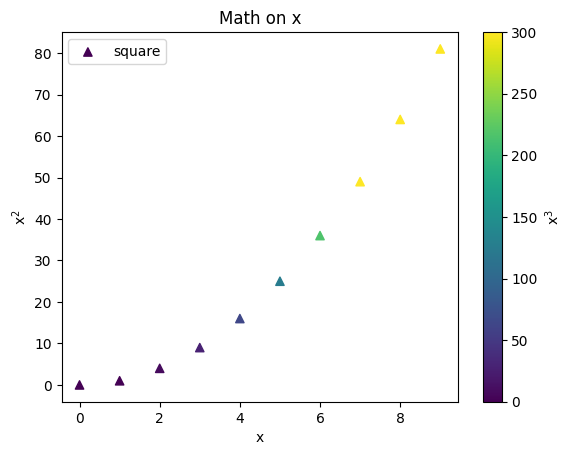

In [14]:
plt.scatter(x, x**2, label="square", c=x**3, marker="^", vmax=300)
plt.legend(loc="best")
plt.colorbar(label=r"x${^3}$") # tex!
plt.xlabel("x")
plt.ylabel(r"x${^2}$") # tex!
plt.title("Math on x")

## Reading data from a file

Data analysis tends to require reading in data. There a number of common file formats nowadays, hdf5, parquet, fits for us astronomers, etc. We can ignore those. Let's stick to plain text files to keep our lives simple. We can use numpy to read structured files (e.g. csv) directly to a numpy array.

In [15]:
dat = np.genfromtxt("TexasCounties.dat", dtype=None, encoding="UTF-8", names=True)
dat.dtype

dtype([('County', '<U13'), ('Senate_R', '<i8'), ('Senate_D', '<i8'), ('Gov_R', '<i8'), ('Gov_D', '<i8'), ('LtGov_R', '<i8'), ('LtGov_D', '<i8'), ('AG_R', '<i8'), ('AG_D', '<i8'), ('area_mi2', '<i8'), ('pop', '<i8'), ('Total_Male', '<i8'), ('Total_Female', '<i8'), ('Anglo_Total', '<i8'), ('Anglo_Male', '<i8'), ('Anglo_Female', '<i8'), ('Black_Total', '<i8'), ('Black_Male', '<i8'), ('Black_Female', '<i8'), ('Other_Total', '<i8')])

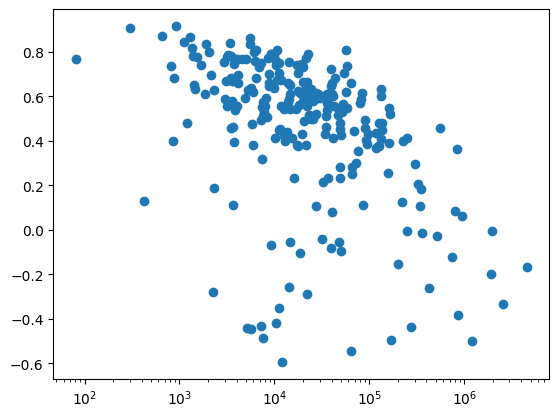

In [16]:
def lean(N_r, N_d):
    return (N_r - N_d) / (N_r + N_d)

plt.scatter(dat["pop"], lean(dat["Senate_R"], dat["Senate_D"]))
plt.gca().set_xscale("log")

## Masking and subsetting data

In intro to programming, you encountered a lot of data that needed to be cleaned up, or perhpas you only wanted to analyze a subset of the data. Let's review some of those techniques.

In most cases, you evaluate some conditional statement with the data. For example some public data is released with very large negative numbers indicating bad values, so you might check where a data column is positive, `data["column"] > 0`. There is an assumption here that `data["column"]` is an array; if it was not this operation would probably throw an error. This results in another array the same length as `data["column"]` now consisting of boolean values, either `True` where the condition is satisfied, or `False` otherwise.

A subset of a `numpy` array can be selected directly with that boolean array. It is also common to use the `np.where` method to select the indices where an array is `True`. This is effectively equivalent if you are only subsetting one array, but in cases where you need to know which indices satisfy your condition. For applications with large arrays (> 10000 elements), you can speed up the code dramatically if you figure out indices once and specificy indices in your loops, as compared to dictionaries or doing some kind of "subsetting" repeatedly.

In [17]:
data = [i for i in range(10)]
data > 5

TypeError: '>' not supported between instances of 'list' and 'int'

In [18]:
print([i > 5 for i in data])  # note this is a list
print(np.array(data) > 5)  # and this is an array

[False, False, False, False, False, False, True, True, True, True]
[False False False False False False  True  True  True  True]


In [19]:
data = np.array(data)

print(data[data > 5])
print(data[np.where(data > 5)])

print(data[data % 2 == 0])

[6 7 8 9]
[6 7 8 9]
[0 2 4 6 8]


In [20]:
print(data > 5)
print(np.where(data > 5))

print(data % 2 == 0)

[False False False False False False  True  True  True  True]
(array([6, 7, 8, 9]),)
[ True False  True False  True False  True False  True False]
